In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

filename = '10.[EXCEL]인천맛집_관광수용태세정보_무장애관광정보.xlsx'

df = pd.read_excel(filename)
df

# 어느 구에 맛집이 가장 많은지 (가장 활성화 되어있는지)
incheon = df[['카테고리 뎁스2', '시군구명', 'x좌표', 'y좌표']]
incheon.columns = ['카테고리', '시군구명', '경도', '위도']
incheon

# 구 / 카테고리 별 분포

,카테고리,시군구명,경도,위도
0,한식,미추홀구,126.665096,37.439787
1,한식,남동구,126.696728,37.446972
2,회,중구,126.613268,37.453706
3,술집,미추홀구,126.666749,37.452697
4,치킨,부평구,126.742504,37.518321
...,...,...,...,...
14001,회,중구,126.502439,37.531453
14002,음료카페,미추홀구,126.661976,37.441451
14003,회,남동구,126.720214,37.463051
14004,술집,서구,126.671109,37.516635


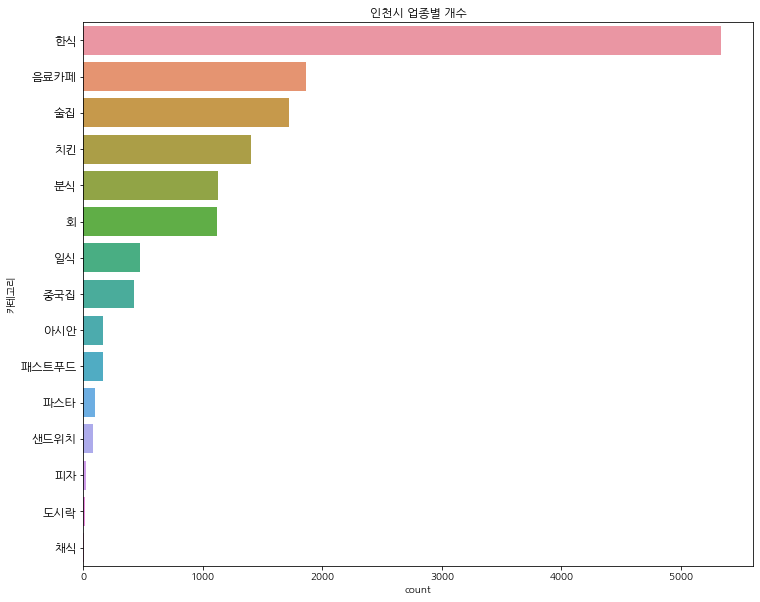

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 10))
sns.countplot(y=incheon['카테고리'], order=incheon['카테고리'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('인천시 업종별 개수')
plt.show()

In [3]:
# obj = pd.Series(incheon['시군구명'])
# obj.unique()

count_data = incheon.groupby('시군구명').count().reset_index()
count_data

pd.DataFrame(count_data, columns=['시군구명', '개수'])
c = count_data[['시군구명', '카테고리']]
c

,시군구명,카테고리
0,강화군,620
1,계양구,1105
2,남동구,2196
3,동구,322
4,미추홀구,2057
5,부평구,2054
6,서구,2416
7,연수구,1662
8,옹진군,217
9,중구,1357


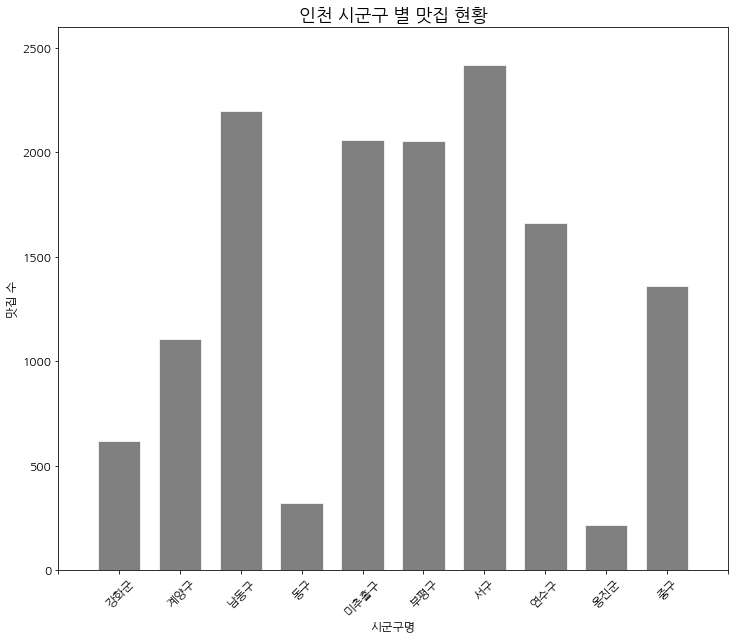

In [4]:
plt.figure(figsize=(12, 10))

x = c['시군구명']
y = c['카테고리']

plt.bar(x, y, width=0.7, edgecolor="white", color='gray', linewidth=0.7)

plt.xlim(0, 8)
plt.ylim((0, 2600))
plt.xticks(np.arange(-1, 11), fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.title('인천 시군구 별 맛집 현황', fontsize=18)
plt.xlabel('시군구명', fontsize=12)
plt.ylabel('맛집 수', fontsize=12)

plt.show()

In [5]:
center = [37.431069510239944, 126.63483680503974] 

m = folium.Map(location=center, zoom_start=10) # tiles='stamentoner'

geo_data = json.load(open('./TL_SCCO_SIG1.json', encoding='UTF-8'))

folium.Choropleth(geo_data=geo_data, data=c,
                   columns=('시군구명', '카테고리'),
                   key_on='feature.properties.SIG_KOR_NM',
                   fill_color='PuRd', legend_name='인천 맛집 분포도' ).add_to(m)
folium.LayerControl().add_to(m)
m